<a href="https://colab.research.google.com/github/pavan-elisetty/tensorflow_/blob/master/MNIST_tf_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0x
import tensorflow as tf
!pip install mitdeeplearning
import mitdeeplearning as md1
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
 #cross checking if the GPU is present
assert len(tf.config.list_physical_devices('GPU'))>0


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
     |████████████████████████████████| 2.1MB 9.4MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=4388b788bac5c83e9d9d29c37c32c92eed87ae664fabbc337f8356a15756cc11
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [6]:
(train_images , train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape #60000 images with 28 * 28 grayscale images

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [12]:
train_images = (np.expand_dims(train_images , axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images , axis=-1)/255.).astype(np.float32)
train_labels=(train_labels).astype(np.int64)
test_labels=(test_labels).astype(np.int64)
#the reason on why we divide with 255 is
'''Pixel values are often unsigned integers in the range between 0 and 255.
 Although these pixel values can be presented directly to neural network models
  in their raw format, this can result in challenges during modeling, 
  such as in the slower than expected training of the model.
Instead, there can be great benefit in preparing the image pixel values
 prior to modeling, such as simply scaling pixel values to the range 0-1
  to centering and even standardizing the values'''


In [13]:
train_images.shape

(60000, 28, 28, 1)

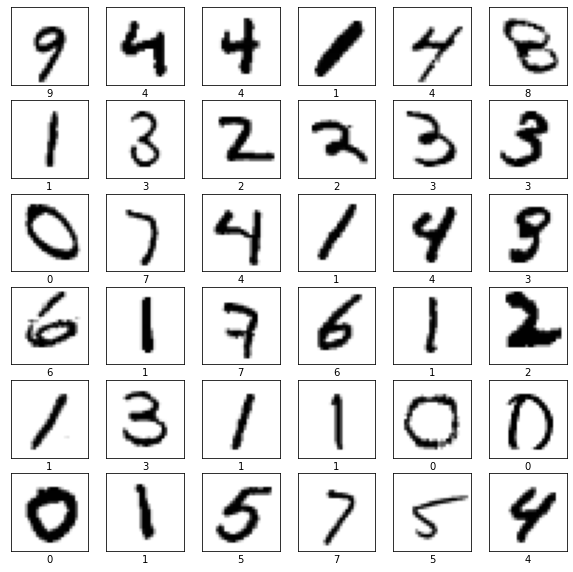

In [14]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

NN we are going to build

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")


#Network architecture

flatten - 28 x 28 images --> 784 pixels (stacking them as a single 1 d array)
flatten dosent contain any learend parameters only restructuring ,
dense layer 1 - 128 nodes ,
dense layer 2 -10 nodes (output nodes) , softmax gives probability b/w 0-1


In [22]:
# Defining a NN

def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
  ])
  return fc_model
model=build_fc_model()



Before training the model, we need to define a few more settings. These are added during the model's compile step:

* *Loss function* — This defines how we measure how accurate the model is during training. we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model. 

In [24]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [25]:
BATCH_SIZE = 64
EPOCHS=5

model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8988
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1961 - accuracy: 0.9443
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1457 - accuracy: 0.9580
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1175 - accuracy: 0.9671
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0984 - accuracy: 0.9724


In [27]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('acc',test_acc)
print('loss',test_loss)

313/313 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9710
acc 0.9710000157356262
loss 0.10078758746385574
